In [1]:
import matplotlib.pyplot as plt
import csv
import numpy as np
from scipy import optimize
import pandas as pd

from scipy import integrate
from scipy import special

In [4]:
# Parameters



m1 = 0.050                                #GeV DM Mass
delta=0.3*m1
m2=m1+delta

mzprime=3*m1                                  #Mass of the dark photon in GeV    150 MeV
Mp = 1.22e19   
m=0.000501                                 # I choose the electron mass in Gev
mmu=0.1057                                 # mass of the muon in GeV


s0= m1**2 + m2**2 + 2*m1*m2
s=np.linspace(0.014,0.4,100)   



vev_scalar=0.5
Y_chi=np.sqrt(2)*m1/vev_scalar      # Is it correct?!?!
mscalar=1  #GeV


m_D=0.420         # From "Dark Neutrino Portal to Explain MiniBooNE excess" pedro paper
U_N=0.94          # BP-A of anomalies and stuff bu Matheus, Asli and Silvia
Y_L=np.sqrt(2)*m_D/vev_scalar
Y_R=np.sqrt(2)*m_D/vev_scalar
U_DL=0.024        # BP-A of anomalies and stuff bu Matheus, Asli and Silvia
U_DR=0.024        # BP-A of anomalies and stuff bu Matheus, Asli and Silvia

Delta_phi=(1/(2*np.sqrt(2)))*(U_N*(Y_L*U_DL+Y_R*U_DR)+ (U_DL*Y_L+U_DR*Y_R)*U_N )
Delta_phi_dagger=(1/(2*np.sqrt(2)))*(U_N*(Y_L*U_DL+Y_R*U_DR)+ (U_DL*Y_L+U_DR*Y_R)*U_N )


epsilon=1E-3               # Has inside some factors as indicated in the computation papers     1E-4
alpha_dark=1E-1               # what values?       (1E-3    -   1E-1)  
alpha_em=1/137


print(Delta_phi)
print(Y_L)

0.03790079999999999
1.1879393923933999


In [7]:
np.sqrt(2)*m1/vev_scalar

0.14142135623730953

### $$m_f=\frac{Y_fv}{\sqrt 2} \ \ \ \Longrightarrow \ \ \ m_\chi=\frac{Y_\chi v_\phi}{\sqrt 2}$$
### From the paper of Asli anomalies: $$\Lambda_{L,R}=\frac{Y_{L,R} v_\phi}{\sqrt 2} $$
### Form "Dark Neutrino Portal to Explain MiniBooNE excess" of pedro I have seen that $m_D=420$ MeV and so I can derive the $Y_{L,R}$ from the formula above

In [8]:
def pfin_pinit_SCALAR(s,m,m1):
    return np.sqrt(abs(((s-2*m**2)**2)-4*(m**4))/abs(((s-2*(m1**2))**2)-4*(m1**4)))

def p_fin_SCALAR(s,m):
    return np.sqrt(abs((((s-2*m**2)**2)-4*(m**4))/4*s))

def p_init_SCALAR(s,m1):
    return np.sqrt(abs((((s-2*m1**2)**2)-4*(m1**4))/4*s))

def E1_SCALAR(s,m1):
    return np.sqrt(m1**2 + p_init_SCALAR(s,m1)**2)

def E2_SCALAR(s,m1):
    return np.sqrt(m2**2 + p_init_SCALAR(s,m1)**2)

[0.05       0.04806276 0.04620057 0.04441054 0.04268986 0.04103585
 0.03944592 0.0379176  0.03644849 0.0350363  0.03367882 0.03237394
 0.03111962 0.02991389 0.02875488 0.02764078 0.02656984 0.0255404
 0.02455084 0.02359962 0.02268526 0.02180632 0.02096144 0.02014929
 0.01936861 0.01861818 0.01789682 0.01720341 0.01653687 0.01589615
 0.01528026 0.01468822 0.01411913 0.01357209 0.01304624 0.01254077
 0.01205488 0.01158781 0.01113884 0.01070727 0.01029242 0.00989364
 0.00951031 0.00914184 0.00878764 0.00844716 0.00811988 0.00780528
 0.00750286 0.00721217 0.00693273 0.00666412 0.00640592 0.00615773
 0.00591915 0.00568981 0.00546936 0.00525745 0.00505375 0.00485794
 0.00466972 0.0044888  0.00431488 0.0041477  0.003987   0.00383252
 0.00368403 0.00354129 0.00340409 0.0032722  0.00314542 0.00302355
 0.0029064  0.00279379 0.00268555 0.0025815  0.00248148 0.00238533
 0.00229291 0.00220407 0.00211868 0.00203659 0.00195768 0.00188183
 0.00180892 0.00173884 0.00167146 0.0016067  0.00154445 0.00148

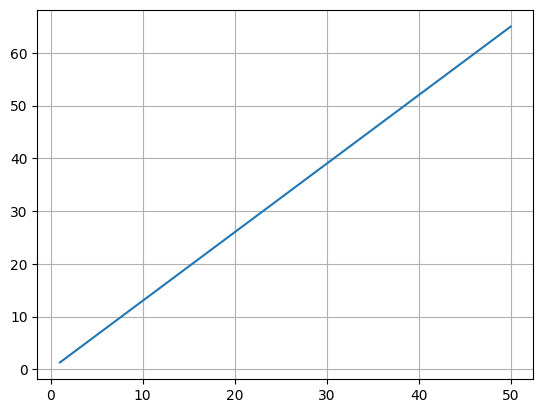

In [9]:
x1=np.logspace(np.log10(1),np.log10(50),100)    


# x=m/T         x1=np.logspace(np.log10(1),np.log10(100),100)


x2=x1*((m1+delta)/m1)
plt.plot(x1,x2)
plt.grid()

T=m2/x2
print(T)
Tsomething=m1/x1        #Just to prove that they are equal
print(Tsomething)

#### $$ \sigma(s) = \frac{1}{64 \pi^2 s} \sqrt{\frac{(s-2m_f^2)^2-4m_f^4}{(s-2m^2)^2-4m^4}} 4 \pi  \frac{16(Y^\chi)^2}{(s-m_{\phi}^2)^2} \Big[ \frac{(s^2-4sm^2- 2sm_f^2+8m^2m_f^2)}{4}\Big[ \frac{(\Delta_{\phi}^\dagger)^2+ (\Delta_{\phi})^2}{2} \Big] + \frac{(4m^2m_f^2-sm_f^2)}{2} \Delta_{\phi}^\dagger \Delta_{\phi} \Big]$$

### Need to understand better what kind of process is that.
### I thought I was computing the coannihilation of two dark matter mass states in SM fermions, but looking to the Benchmark points of Asli, Matheus and Silvia's paper the $\Delta_\phi$ coupling is much suppressed with SM fermions respect to HNL..

In [10]:
def sigma_SCALAR(s,m,m1):
    return ((4*np.pi)/(64*(np.pi**2)*s))*((16*(Y_chi**2))/((s**2-mscalar**2)**2))*(pfin_pinit_SCALAR(s,m,m1))*(((s**2 - 4*s*(m1**2) -2*s*(m**2) + 8*(m**2)*(m1**2) )/(4))*((Delta_phi**2 + Delta_phi_dagger**2)/(2)) + ((4*(m**2)*(m1**2)-s*(m**2))/(2))*(Delta_phi_dagger*Delta_phi) )           


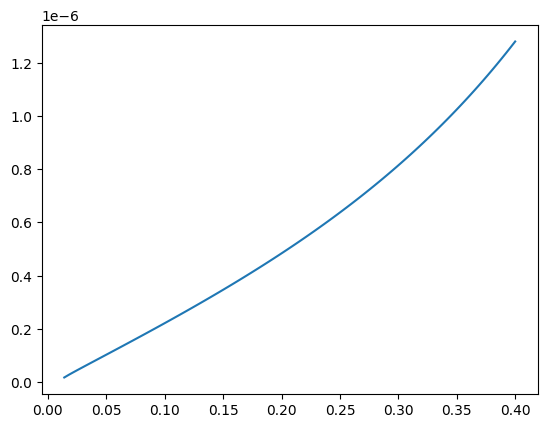

In [11]:
plt.plot(s,sigma_SCALAR(s,m,m1))

In [12]:
Tfo1=0.002202871657707813
Tfo2=0.002831671668678899

In [13]:
NUMERATOR=integrate.quad(lambda s_tilda: sigma_SCALAR(s_tilda,m,m1)*(s_tilda-s0) *np.sqrt(s_tilda)* special.kv(1,np.sqrt(s_tilda)/Tfo2), s0, np.inf )[0]    

NUMERATOR


5.903281937430401e-34

In [14]:
DENOMINATOR= 1/(8* m1**2 * m2**2  *Tfo2 *(special.kn(2,m1/Tfo2)*(special.kn(2,m2/Tfo2))))

DENOMINATOR

1.9360439879443538e+25

In [15]:
SIGMAVTERMAL=NUMERATOR*DENOMINATOR

SIGMAVTERMAL

1.1429013504102626e-08

In [16]:
SIGMAVTERMAL*1.1669385*1E-17

1.3336955874957266e-25